In [1]:
import numpy as np
import random as r
import pandas as pd
from matplotlib import pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
%matplotlib inline

### Perceptrones

In [2]:
def step(x, y, w, eta):
    err = y - np.sign(np.dot(x,w))
    #print y, sum(w*x), err
    #print eta, err, x, eta*err*x
    w = w + eta*err*x
    return w

def perceptron(x, y, w, eta=0.1, maxiter=100, tol=1e-5):
    k = 0
    iter = 0
    errs = []
    while iter < maxiter:
        w = step(x[k,:], y[k], w, eta)
        err = sum((y - np.sign(np.dot(x, w)))**2)
        errs.append(err)
        if k >= x.shape[0] - 1:
            k = 0
        else:
            k = k + 1
        iter = iter + 1
    return w, errs

def predict(x, w):
    return np.sign(np.dot(x,w))

### Función lógica AND

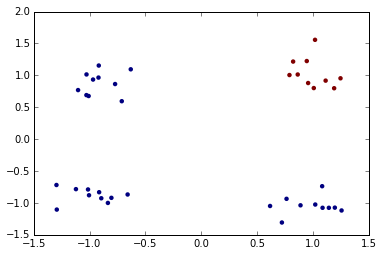

In [69]:
r.seed(1234)
n = 1000
wstar = np.array([5,4,3])
#x = np.array([[1, r.normalvariate(0,5), r.normalvariate(0,5)] for i in range(n)])
#y = np.dot(x, wstar)
x = np.array([[-1,-1],[-1,1],[1,-1],[1,1]]*10, dtype='float64')
x = x + 0.2*np.random.randn(x.shape[0],x.shape[1])
x = np.column_stack((np.ones(40), x))
y = np.array([-1,-1,-1,1]*10, dtype='float64')
y = np.sign(y) #np.sign(y + [r.normalvariate(0,4) for i in range(len(y))])
plt.scatter(x[:,1], x[:,2],linewidths=0,c=y)

In [70]:
w0 = np.array([2,1,0])
w1, errs1 = perceptron(x, y, w0, eta=0.001, maxiter=10000)
#w2, errs2 = perceptron(x, y, w0, eta=0.01, maxiter=5000) # La solución varía mucho
print w1

[-0.276       0.69520406  0.65039693]


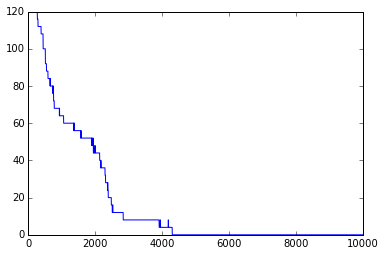

In [71]:
plt.plot(errs1)
#plt.plot(errs2)

Error: 0


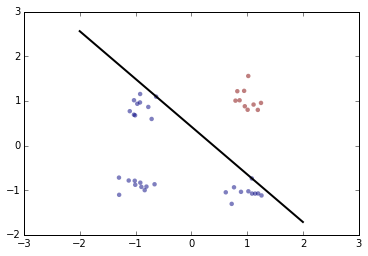

In [74]:
a = np.linspace(-2,2,100)
plt.scatter(x[:,1], x[:,2],linewidths=0, c=y, alpha=0.5)
plt.plot(a, -1/w1[2]*(w1[0] + w1[1]*a), color='black', linewidth=2)
print 'Error: %d' % sum((y - predict(x,w1))**2)

### Ahora con datos regLin4

In [49]:
df = pd.read_csv('datos/regLin4.csv')
x = np.column_stack((np.ones(len(df['X'])), np.array(df['X'])))
y = 2*np.array(df['y']) - 1

[ 0.984      -0.03282226]


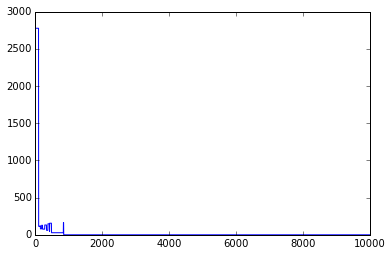

In [51]:
w0 = np.ones(2)
w1, errs1 = perceptron(x, y, w0, eta=0.0001, maxiter=10000)
print w1
plt.plot(errs1)

Error: 0


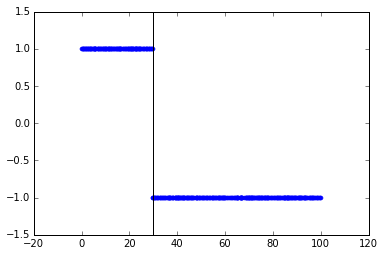

In [57]:
a = np.linspace(-15,15,100)
plt.scatter(x[:,1], y,linewidths=0, alpha=0.5)
plt.axvline(-w1[0]/w1[1], color='black')
#plt.plot(a, -1/w1[2]*(w1[0] + w1[1]*a), color='black', linewidth=2)
print 'Error: %d' % sum((y - predict(x,w1))**2)